In [1]:
from shapely.geometry import LineString, Polygon, MultiLineString
from shapely.ops import triangulate, polygonize
import shapely
import geopandas as gpd
from geopandas.array import from_shapely
import numpy as np
from scipy.spatial import Voronoi
import pygeos

In [3]:
realdf = gpd.read_file('/Users/martin/Dropbox/Python/Jupyter/edges.geojson')
realdf.to_file('/Users/martin/Dropbox/Python/Jupyter/edges2.geojson', driver='GeoJSON')

In [2]:
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])

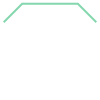

In [95]:
top

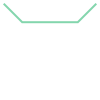

In [96]:
bottom

In [12]:
pt = top.interpolate(2)
pt.wkt

'POINT (1.585786437626905 1)'

In [14]:
pt_b = bottom.interpolate(bottom.project(pt))

In [15]:
pt_b.wkt

'POINT (0.2928932188134524 -0.2928932188134524)'

In [17]:
s = gpd.GeoSeries([top, bottom, pt, pt_b])

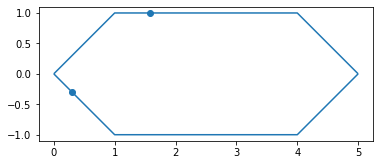

In [18]:
s.plot()

In [20]:
c = LineString([pt, pt_b]).centroid

In [23]:
s = gpd.GeoSeries([top, bottom, pt, pt_b, c])

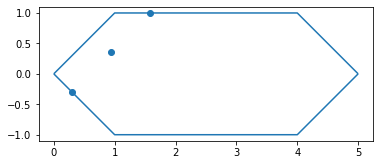

In [24]:
s.plot()

In [97]:
edges = gpd.GeoSeries(triangulate(top.union(bottom), edges=True))

In [98]:
orig = gpd.GeoSeries([top, bottom])

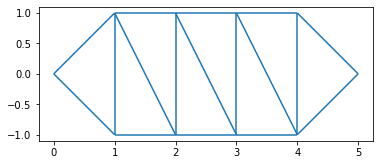

In [40]:
edges.plot()

In [99]:
cents = edges.centroid

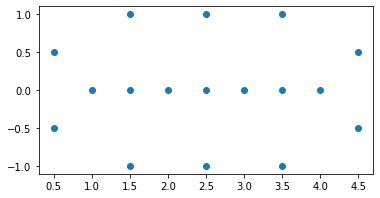

In [42]:
cents.plot()

In [56]:
orig.sindex.query_bulk(edges, predicate='within')

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [100]:
axis = cents.drop(orig.sindex.query_bulk(cents, predicate='intersects')[0])

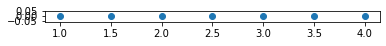

In [101]:
axis.plot()

In [104]:
average = LineString([start] + [p for p in axis] + [end])

In [105]:
av = gpd.GeoSeries(average)

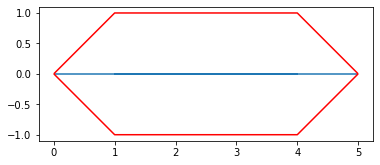

In [107]:
ax = av.plot()
orig.plot(ax=ax, color='r')

## clean version

In [108]:
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = gpd.GeoSeries([top, bottom])

In [109]:
centroids = gpd.GeoSeries(triangulate(top.union(bottom), edges=True)).centroid
axis = centroids.drop(orig.sindex.query_bulk(centroids, predicate='intersects')[0])

In [110]:
average = LineString([start] + [p for p in axis] + [end])

In [111]:
average.wkt

'LINESTRING (0 0, 4 0, 3.5 0, 3 0, 2.5 0, 2 0, 1.5 0, 1 0, 5 0)'

In [129]:
%%timeit
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = gpd.GeoSeries([top, bottom])

centroids = gpd.GeoSeries(triangulate(top.union(bottom), edges=True)).centroid
axis = centroids.drop(orig.sindex.query_bulk(centroids, predicate='intersects')[0])

average = LineString([start] + [p for p in axis] + [end])

1.89 ms ± 43.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [116]:
%%timeit
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1),  (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = gpd.GeoSeries([top, bottom])


316 µs ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [117]:
%%timeit
centroids = gpd.GeoSeries(triangulate(top.union(bottom), edges=True)).centroid


784 µs ± 71.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [118]:
%%timeit
axis = centroids.drop(orig.sindex.query_bulk(centroids, predicate='intersects')[0])

646 µs ± 179 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [119]:
%%timeit
average = LineString([start] + [p for p in axis] + [end])

138 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [120]:
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = gpd.GeoSeries([top, bottom])

centroids = gpd.GeoSeries(triangulate(top.union(bottom), edges=True)).centroid
axis = centroids.drop(orig.sindex.query_bulk(centroids, predicate='intersects')[0])

average = LineString([start] + [p for p in axis] + [end])

In [121]:
union = top.union(bottom)

In [123]:
centroids.intersects(union)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [124]:
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = top.union(bottom)

centroids = gpd.GeoSeries(triangulate(orig, edges=True)).centroid
axis = centroids[~centroids.intersects(orig)]

average = LineString([start] + [p for p in axis] + [end])

In [128]:
%%timeit
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = top.union(bottom)

centroids = gpd.GeoSeries(triangulate(orig, edges=True)).centroid
axis = centroids[~centroids.intersects(orig)]

average = LineString([start] + [p for p in axis] + [end])

1.97 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [144]:
%%timeit
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = top.union(bottom)

centroids = from_shapely(triangulate(orig, edges=True)).centroid
axis = centroids[~centroids.intersects(orig)]

average = LineString([start] + [p for p in axis] + [end])

996 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [145]:
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
orig = top.union(bottom)

centroids = from_shapely(triangulate(orig, edges=True)).centroid
axis = centroids[~centroids.intersects(orig)]

average = LineString([start] + [p for p in axis] + [end])

In [147]:
def consolidate(start, end, line1, line2):
    orig = line1.union(line2)

    centroids = from_shapely(triangulate(orig, edges=True)).centroid
    axis = centroids[~centroids.intersects(orig)]

    return LineString([start] + [p for p in axis] + [end])

In [263]:
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 3), (2, 2.5), (3, 1.2), (4.3, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])

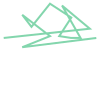

In [149]:
consolidate(start, end, top, bottom)

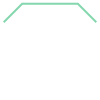

In [262]:
top

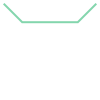

In [151]:
bottom

In [165]:
orig = top.union(bottom)

centroids = from_shapely(triangulate(orig, edges=True)).centroid
axis = centroids[~centroids.intersects(orig) & centroids.intersects(list(polygonize(orig))[0])]

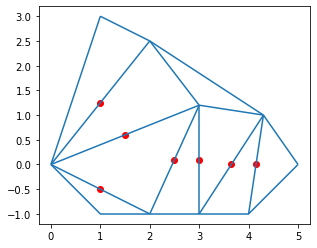

In [172]:
ax = gpd.GeoSeries(triangulate(orig, edges=True)).plot()
gpd.GeoSeries(axis).plot(ax=ax, color='r')

<Figure size 432x288 with 0 Axes>

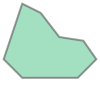

In [167]:
list(polygonize(orig))[0]

## another approach

In [471]:
distance = 1
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 3), (2, 2.5), (3, 1.2), (4.3, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
lines = [top, bottom]

In [452]:
points = []
ids = []

extended_lines = [list(polygonize(lines))[0].buffer(distance).exterior] + lines

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

In [453]:
voronoi_diagram = Voronoi(np.array(points))

In [229]:
# generate regions
def _regions(voronoi_diagram, ids):
    """
    Generate GeoDataFrame of Voronoi regions from scipy.spatial.Voronoi.
    """
    import pandas as pd
    from shapely.geometry import Polygon

    # generate DataFrame of results
    regions = pd.DataFrame({'ids': ids, 'region': voronoi_diagram.point_region})

    # add vertices of each polygon
    vertices = []
    for region in regions.region:
        vertices.append(voronoi_diagram.regions[region])
    regions["vertices"] = vertices

    # convert vertices to Polygons
    polygons = []
    for region in regions.vertices:
        if -1 not in region:
            polygons.append(Polygon(voronoi_diagram.vertices[region]))
        else:
            polygons.append(None)
    # save polygons as geometry column
    regions["geometry"] = polygons

    # generate GeoDataFrame
    regions_gdf = gpd.GeoDataFrame(regions.dropna(), geometry="geometry")
    regions_gdf = regions_gdf.loc[
        regions_gdf['ids'] != 0
    ]  # delete external cells
    return regions_gdf

In [455]:
regions_gdf = _regions(voronoi_diagram, ids)
tessellation = regions_gdf[["ids", "geometry"]].dissolve(by="ids", as_index=False)
linestring = tessellation.geometry.exterior[0]
clipped = linestring.intersection(list(polygonize(lines))[0])
if hasattr(clipped, '__len__'):
    lengths = []
    for part in clipped:
        lengths.append(part.length)
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

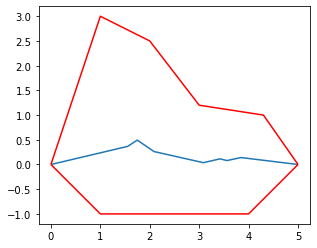

In [456]:
ax = gpd.GeoSeries(average).plot()
gpd.GeoSeries(orig).plot(ax=ax, color='r')

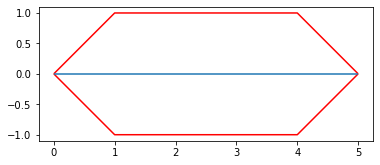

In [470]:
distance = 1
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
lines = [top, bottom]

poly = list(polygonize(lines))[0]
points = []
ids = []

extended_lines = [poly.buffer(distance).exterior] + lines

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

voronoi_diagram = Voronoi(np.array(points))

regions_gdf = _regions(voronoi_diagram, ids)
tessellation = regions_gdf[["ids", "geometry"]].dissolve(by="ids", as_index=False)
linestring = tessellation.geometry.exterior[0]
clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = []
    for part in clipped:
        lengths.append(part.length)
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

ax = gpd.GeoSeries(lines).plot(color='r')
gpd.GeoSeries(average).plot(ax=ax)


In [472]:
%%timeit

poly = list(polygonize(lines))[0]
points = []
ids = []

extended_lines = [poly.buffer(distance).exterior] + lines

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

voronoi_diagram = Voronoi(np.array(points))

regions_gdf = _regions(voronoi_diagram, ids)
tessellation = regions_gdf[["ids", "geometry"]].dissolve(by="ids", as_index=False)
linestring = tessellation.geometry.exterior[0]
clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = []
    for part in clipped:
        lengths.append(part.length)
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

22.3 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [473]:
polygons = []
for point_region in voronoi_diagram.point_region:
    region = voronoi_diagram.regions[point_region]
    if -1 not in region:
        polygons.append(Polygon(voronoi_diagram.vertices[region]))
    else:
        polygons.append(None)

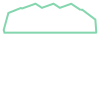

In [483]:
from_shapely(polygons)[np.array(ids) == 1].unary_union().exterior

In [508]:
%%timeit

poly = list(polygonize(lines))[0]
points = []
ids = []

extended_lines = [poly.buffer(distance).exterior] + lines

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

voronoi_diagram = Voronoi(np.array(points))

polygons = []
for point_region in voronoi_diagram.point_region:
    region = voronoi_diagram.regions[point_region]
    if -1 not in region:
        polygons.append(Polygon(voronoi_diagram.vertices[region]))
    else:
        polygons.append(None)

linestring = from_shapely(polygons)[np.array(ids) == 1].unary_union().exterior

clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = [part.length for part in clipped]
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

4.26 ms ± 70.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [502]:
%%timeit
poly = list(polygonize(lines))[0]
points = []
ids = []

116 µs ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [503]:
%%timeit
extended_lines = [poly.buffer(distance).exterior] + lines

110 µs ± 67.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [504]:
%%timeit
for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

1.29 ms ± 87 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [511]:
%%timeit
voronoi_diagram = Voronoi(np.array(points))

693 µs ± 26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [513]:
%%timeit
polygons = []
for point_region in voronoi_diagram.point_region:
    region = voronoi_diagram.regions[point_region]
    if -1 not in region:
        polygons.append(Polygon(voronoi_diagram.vertices[region]))
    else:
        polygons.append(None)


406 µs ± 35.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [515]:
%%timeit
linestring = from_shapely(polygons)[np.array(ids) == 1].unary_union().exterior

1.69 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [517]:
%%timeit
clipped = linestring.intersection(poly)

150 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [522]:
%%timeit
clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = [part.length for part in clipped]
    clipped = clipped[lengths.index(max(lengths))]

143 µs ± 3.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [523]:
%%timeit
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

29.2 µs ± 8.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [527]:
import pygeos

In [528]:
py_line = pygeos.io.from_shapely(line)

In [529]:
pygeos.linear.line_interpolate_point(py_line, [1, 2, 3, 4, 5])

array([<pygeos.Geometry POINT (0.707 -0.707)>,
       <pygeos.Geometry POINT (1.59 -1)>,
       <pygeos.Geometry POINT (2.59 -1)>,
       <pygeos.Geometry POINT (3.59 -1)>,
       <pygeos.Geometry POINT (4.41 -0.586)>], dtype=object)

In [530]:
extended_lines

In [537]:
np.linspace(0, line.length, num=int(line.length//1))

array([0.        , 1.45710678, 2.91421356, 4.37132034, 5.82842712])

In [535]:
pygeos.linear.line_interpolate_point(py_line, [1, 2, 3, 4, 5])

3

In [597]:
%%timeit
points = []
ids = []
for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

1.25 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [609]:
%%timeit
points = np.empty((0, 2))
ids = []
pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

333 µs ± 88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [170]:
%%timeit

distance = 1
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

polygons = []
for point_region in voronoi_diagram.point_region:
    region = voronoi_diagram.regions[point_region]
    if -1 not in region:
        polygons.append(Polygon(voronoi_diagram.vertices[region]))
    else:
        polygons.append(None)

linestring = from_shapely(polygons)[np.array(ids) == 1].unary_union().exterior

clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = [part.length for part in clipped]
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

2.89 ms ± 464 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
distance = 1
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 1), (2, 1), (3, 1), (4, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

In [88]:
voronoi_diagram.ridge_vertices

[[-1, 0],
 [0, 4],
 [-1, 4],
 [-1, 2],
 [2, 6],
 [-1, 6],
 [1, 5],
 [-1, 1],
 [-1, 5],
 [8, 11],
 [8, 10],
 [9, 12],
 [9, 10],
 [11, 13],
 [12, 13],
 [-1, 10],
 [2, 8],
 [-1, 9],
 [-1, 12],
 [-1, 7],
 [7, 13],
 [-1, 15],
 [-1, 14],
 [14, 16],
 [15, 16],
 [7, 15],
 [0, 3],
 [3, 14],
 [17, 20],
 [17, 18],
 [20, 21],
 [19, 21],
 [18, 19],
 [1, 17],
 [-1, 18],
 [3, 20],
 [16, 21],
 [6, 19],
 [11, 21],
 [22, 25],
 [22, 23],
 [23, 27],
 [24, 26],
 [24, 25],
 [26, 27],
 [4, 22],
 [-1, 25],
 [20, 23],
 [5, 27],
 [-1, 24],
 [-1, 26]]

In [62]:
pts = voronoi_diagram.ridge_points
pts

array([[11, 12],
       [11, 25],
       [11, 10],
       [ 3,  2],
       [ 3, 18],
       [ 3,  4],
       [ 6, 20],
       [ 6,  5],
       [ 6,  7],
       [22, 18],
       [22,  2],
       [22,  0],
       [22,  1],
       [22, 23],
       [22, 15],
       [ 2,  1],
       [ 2, 18],
       [ 0,  1],
       [ 0, 15],
       [15, 14],
       [15, 23],
       [13, 14],
       [13, 12],
       [13, 24],
       [13, 23],
       [14, 23],
       [12, 25],
       [12, 24],
       [19, 20],
       [19,  5],
       [19, 24],
       [19, 18],
       [19,  4],
       [ 5, 20],
       [ 5,  4],
       [24, 25],
       [24, 23],
       [18,  4],
       [18, 23],
       [26, 10],
       [26, 25],
       [26, 20],
       [26,  8],
       [26,  9],
       [26,  7],
       [10, 25],
       [10,  9],
       [25, 20],
       [20,  7],
       [ 8,  9],
       [ 8,  7]], dtype=int32)

In [126]:
def f(row):
    if (ids.index(1) <= row[0] <  ids.index(2)) and (row[1] >=  ids.index(2)):
        return True
    if (ids.index(1) <= row[1] <  ids.index(2)) and (row[0] >=  ids.index(2)):
        return True
    return False

In [137]:
def test(row):
    a = ids[row[0]]
    b = ids[row[1]]
    if a in [1, 2] and b in [1, 2] and a != b:
        return True
    return False    

In [139]:
mask = np.apply_along_axis(test, 1, pts)
mask

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False])

In [140]:
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

In [141]:
lss = []
for f, l in verts:
    lss.append(LineString([voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]]))

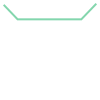

In [143]:
linemerge(lss)

In [144]:
coords = list(linemerge(lss).coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

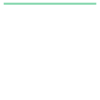

In [145]:
average

In [165]:
def edge(row): 
    a = ids[row[0]]
    b = ids[row[1]]
    if a in [1, 2] and b in [1, 2] and a != b:
        return True
    return False  

In [192]:
%%timeit

distance = 1
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 3), (2, 2.5), (3, 1.2), (4.3, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

pts = voronoi_diagram.ridge_points

mask = np.apply_along_axis(edge, axis=1, arr=pts)
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

edgeline = linemerge([LineString([voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]]) for f, l in verts])
if hasattr(edgeline, '__len__'):
    lengths = [part.length for part in edgeline]
    edgeline = edgeline[lengths.index(max(lengths))]
coords = list(edgeline.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

2.46 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


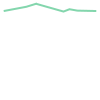

In [193]:
%%timeit

distance = 1
start = (0, 0)
end = (5, 0)
top = LineString([start, (1, 3), (2, 2.5), (3, 1.2), (4.3, 1), end])
bottom = LineString([start, (1, -1), (2, -1), (3, -1), (4, -1), end])
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

pts = voronoi_diagram.ridge_points

mask = np.apply_along_axis(edge, axis=1, arr=pts)
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

strings = pygeos.linestrings([[voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]] for f, l in verts])
edgeline = pygeos.line_merge(pygeos.union_all(strings))


coords = list(pygeos.get_coordinates(edgeline))
coords[0] = end
coords[-1] = start
average = LineString(coords)

2.34 ms ± 340 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [199]:
realdf = gpd.read_file('/Users/martin/Dropbox/Python/Jupyter/edges.geojson').to_crs(5514)

In [264]:
top = realdf.loc[0, 'geometry']
bottom = realdf.loc[1, 'geometry']
start = top.coords[0]
end = top.coords[-1]
distance = 2

In [223]:
%%timeit
# FULL PYGEOS
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

pts = voronoi_diagram.ridge_points

mask = np.apply_along_axis(edge, axis=1, arr=pts)
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

strings = pygeos.linestrings([[voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]] for f, l in verts])
edgeline = pygeos.line_merge(pygeos.union_all(strings))


coords = list(pygeos.get_coordinates(edgeline))
# resolve start/end join
coords[0] = start
coords[-1] = end
average = LineString(coords)

308 ms ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [224]:
%%timeit
# PYGEOS INTERPOLATE + SHAPELY LINEMERGE
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

pts = voronoi_diagram.ridge_points

mask = np.apply_along_axis(edge, axis=1, arr=pts)
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

edgeline = linemerge([LineString([voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]]) for f, l in verts])
if hasattr(edgeline, '__len__'):
    lengths = [part.length for part in edgeline]
    edgeline = edgeline[lengths.index(max(lengths))]
coords = list(edgeline.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

295 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [227]:
%%timeit
# PYGEOS INTERPOLATE + SHAPELY INTERSECTION
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.array(points))

polygons = []
for point_region in voronoi_diagram.point_region:
    region = voronoi_diagram.regions[point_region]
    if -1 not in region:
        polygons.append(Polygon(voronoi_diagram.vertices[region]))
    else:
        polygons.append(None)

linestring = from_shapely(polygons)[np.array(ids) == 1].unary_union().exterior

clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = [part.length for part in clipped]
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

533 ms ± 54.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [228]:
%%timeit
# SHAPELY INTERPOLATE + SHAPELY INTERSECTION
lines = [top, bottom]

poly = list(polygonize(lines))[0]
points = []
ids = []

extended_lines = [poly.buffer(distance).exterior] + lines

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

voronoi_diagram = Voronoi(np.array(points))

polygons = []
for point_region in voronoi_diagram.point_region:
    region = voronoi_diagram.regions[point_region]
    if -1 not in region:
        polygons.append(Polygon(voronoi_diagram.vertices[region]))
    else:
        polygons.append(None)

linestring = from_shapely(polygons)[np.array(ids) == 1].unary_union().exterior

clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = [part.length for part in clipped]
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

716 ms ± 44.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [230]:
%%timeit
# SHAPELY INTERPOLATE + SHAPELY INTERSECTION + GEOPANDAS
lines = [top, bottom]

poly = list(polygonize(lines))[0]
points = []
ids = []

extended_lines = [poly.buffer(distance).exterior] + lines

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

voronoi_diagram = Voronoi(np.array(points))

regions_gdf = _regions(voronoi_diagram, ids)
tessellation = regions_gdf[["ids", "geometry"]].dissolve(by="ids", as_index=False)
linestring = tessellation.geometry.exterior[0]
clipped = linestring.intersection(poly)
if hasattr(clipped, '__len__'):
    lengths = []
    for part in clipped:
        lengths.append(part.length)
    clipped = clipped[lengths.index(max(lengths))]
coords = list(clipped.coords)
coords[0] = end
coords[-1] = start
average = LineString(coords)

1.16 s ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [232]:
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

In [233]:
%%timeit
points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.io.from_shapely(extended_lines)
lengths = pygeos.measurement.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.linear.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.coordinates.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

33.4 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [234]:
%%timeit
points = []
ids = []

for ix, line in enumerate(extended_lines):
    current_dist = distance
    line_length = line.length

    while current_dist < line_length:
        points.append(list(line.interpolate(current_dist).coords)[0])
        ids.append(ix)
        current_dist += distance

397 ms ± 200 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [371]:
# helper functions
def get_ids(x):
    return ids[x]
mp = np.vectorize(get_ids)

def dist(p1, p2):
    return np.sqrt(((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))

def get_verts(x):
    return voronoi_diagram.vertices[x]

In [277]:
%%timeit
# PYGEOS INTERPOLATE + SHAPELY LINEMERGE = OPTIMUM
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = []
ids = []

pygeos_lines = pygeos.from_shapely(extended_lines)
lengths = pygeos.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.line_interpolate_point(
        line, np.linspace(0, length, num=int(length // distance))
    )
    points.append(pygeos.get_coordinates(pts))
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(np.concatenate(points))

pts = voronoi_diagram.ridge_points

mask = np.apply_along_axis(edge, axis=1, arr=pts)
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

edgeline = linemerge(
    [
        LineString([voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]])
        for f, l in verts
    ]
)
if hasattr(edgeline, "__len__"):
    lengths = [part.length for part in edgeline]
    edgeline = edgeline[lengths.index(max(lengths))]
coords = list(edgeline.coords)

if dist(coords[0], start) > dist(coords[0], end):
    coords[0] = end
    coords[-1] = start
else:
    coords[0] = start
    coords[-1] = end
average = LineString(coords)


274 ms ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [305]:
%%timeit
edgeline = linemerge(
    [
        LineString([voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]])
        for f, l in verts
    ]
)

213 ms ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [301]:
%%timeit
strings = pygeos.linestrings([[voronoi_diagram.vertices[f], voronoi_diagram.vertices[l]] for f, l in verts])
edgeline = pygeos.line_merge(pygeos.union_all(strings))

77.9 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [296]:
def get_verts(x):
    return voronoi_diagram.vertices[x]

In [304]:
%%timeit
strings = pygeos.linestrings(get_verts(verts))
edgeline = pygeos.line_merge(pygeos.union_all(strings))

48.7 ms ± 7.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# helper functions
def get_ids(x):
    return ids[x]
mp = np.vectorize(get_ids)

def dist(p1, p2):
    return np.sqrt(((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))

def get_verts(x):
    return voronoi_diagram.vertices[x]

In [401]:
%%timeit
# FULL PYGEOS - SUPER PERFORMANCE
lines = [top, bottom]

poly = list(polygonize(lines))[0]

extended_lines = [poly.buffer(distance).exterior] + lines

points = np.empty((0, 2))
ids = []

pygeos_lines = pygeos.from_shapely(extended_lines)
lengths = pygeos.length(pygeos_lines)
for ix, (line, length) in enumerate(zip(pygeos_lines, lengths)):
    pts = pygeos.line_interpolate_point(line, 
        np.linspace(0, length, num=int(length//distance))
        )
    points = np.append(points, pygeos.get_coordinates(pts), axis=0)
    ids += [ix] * len(pts)

voronoi_diagram = Voronoi(points)

pts = voronoi_diagram.ridge_points

mapped = mp(pts)
mask = np.isin(mapped[:, 0], [1, 2]) & np.isin(mapped[:, 1], [1, 2]) & (mapped[:, 0] != mapped[:, 1])
rigde_vertices = np.array(voronoi_diagram.ridge_vertices)
verts = rigde_vertices[mask]

edgeline = pygeos.line_merge(pygeos.multilinestrings(get_verts(verts)))
coords = pygeos.get_coordinates(edgeline)
if dist(coords[0], start) > dist(coords[0], end):
    coords[0] = end
    coords[-1] = start
else:
    coords[0] = start
    coords[-1] = end
average = LineString(coords)

131 ms ± 31.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
import itertools

In [4]:
list(itertools.combinations(range(4), 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]